In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [3]:
import matplotlib.pyplot as plt

In [4]:
import wooldridge as woo
import pandas as pd
import linearmodels as plm

In [5]:
rggi = ['ME', 'NH', 'VT', 'MA', 'CT', 'RI', 'NY', 'NJ', 'DE', 'MD', 'VA']
rggi2 = ['NH', 'VT', 'MA', 'CT', 'RI', 'NY', 'NJ', 'DE', 'MD', 'VA']
california = ['CA']
other_states = ['AL', 'AK', 'AZ', 'AR', 'NC', 'SC', 'CO', 'ND', 'SD', 'FL', 'GA', 'HI', 'ID', 'IN', 'IL', 
                'IA', 'KS', 'KY', 'LA', 'MI', 'MN', 'MS', 'MT', 'MO', 'NE', 'NV', 'NM', 'OH', 'OK', 'OR', 'PA',
               'TN', 'TX', 'UT', 'WV', 'WA', 'WI', 'WY']
CO2_market = rggi + california
all_states = rggi + california + other_states
all_states2 = rggi2 + california + other_states

In [6]:
df = pd.read_csv('Data_Treatment/treated_data/Panel/final_panel_btu.csv', sep=';')

In [6]:
df['ratio_production'] = (df['Production_GWh'])/(df['Total_Production_GWh'])

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df = df.drop(['Demand_GWh'], axis = 1)

In [9]:
df

,Time,State,Solar_Production_GWh,Wind_Production_GWh,Production_GWh,Gas_Production_GWh,Gas_Plants,Total_Production_GWh,Plant_Id,Ratio,Year,Month,Coal_prices,Gas_prices,CO2_prices,ratio_production
0,2008.916667,AK,0.000000,0.003269,53585.611,3.562135e+05,15.0,6.748301e+05,5,0.079406,2008,12,2.2073,6.4407,0.000000,0.079406
1,2008.916667,AL,0.000000,0.000000,5797924.613,1.419037e+06,63.0,1.233743e+07,17,0.469946,2008,12,2.2073,6.4407,0.000000,0.469946
2,2008.916667,AR,0.000000,0.000000,2477437.868,5.174601e+05,33.0,4.396608e+06,4,0.563489,2008,12,2.2073,6.4407,0.000000,0.563489
3,2008.916667,AZ,1.209780,0.000000,3469462.461,2.572104e+06,55.0,9.037042e+06,11,0.383916,2008,12,2.2073,6.4407,0.000000,0.383916
4,2008.916667,CA,11.394780,240.104864,205587.045,1.048698e+07,385.0,1.642445e+07,12,0.012517,2008,12,2.2073,6.4407,0.000000,0.012517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2021.416667,VA,316.732063,3.563000,150293.326,5.150745e+06,46.0,8.542606e+06,20,0.017593,2021,6,2.0101,3.9907,8.785422,0.017593
7280,2021.416667,WA,6.925610,624.863410,2345.292,1.156067e+06,25.0,9.737993e+06,5,0.000241,2021,6,2.0101,3.9907,0.000000,0.000241
7281,2021.416667,WI,43.496969,103.577742,646822.234,2.199532e+06,43.0,6.195993e+06,26,0.104394,2021,6,2.0101,3.9907,0.000000,0.104394
7282,2021.416667,WV,0.000000,83.546000,4517910.633,2.847660e+05,9.0,6.869827e+06,13,0.657645,2021,6,2.0101,3.9907,0.000000,0.657645


In [10]:
def indicator(x):
    if x !=0:
        return(1)
    else:
        return(0)

In [7]:
panel = pd.read_excel('Data_Treatment/treated_data/Panel/panel_final.xlsx')

In [12]:
final_panel = pd.read_csv('Data_Treatment/treated_data/Panel/final_panel.csv', sep=';').drop('Unnamed: 0', axis=1).dropna()
final_panel = final_panel.dropna()

In [13]:
final_panel

,Time,State,Coal_prices,Gas_prices,Demand_GWh,Solar_Production_GWh,Wind_Production_GWh,Production_GWh,Gas_Production_GWh,Gas_Plants,Total_Production_GWh,Coal_Plants,Ratio_State,Total_Production_USA_GWh,Ratio_Total,CO2_prices
0,2008.916667,AK,43.30,6.4407,343898.254469,0.000000,0.003269,53585.611,3.562135e+05,15.0,6.748301e+05,5,0.079406,3.426496e+08,0.000156,0.000000
1,2008.916667,AL,43.30,6.4407,343898.254469,0.000000,0.000000,5797924.613,1.419037e+06,63.0,1.233743e+07,17,0.469946,3.426496e+08,0.016921,0.000000
2,2008.916667,AR,43.30,6.4407,343898.254469,0.000000,0.000000,2477437.868,5.174601e+05,33.0,4.396608e+06,4,0.563489,3.426496e+08,0.007230,0.000000
3,2008.916667,AZ,43.30,6.4407,343898.254469,1.209780,0.000000,3469462.461,2.572104e+06,55.0,9.037042e+06,11,0.383916,3.426496e+08,0.010125,0.000000
4,2008.916667,CA,43.30,6.4407,343898.254469,11.394780,240.104864,205587.045,1.048698e+07,385.0,1.642445e+07,12,0.012517,3.426496e+08,0.000600,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,2020.916667,VA,26.16,3.2212,344335.224315,93.725208,0.000000,644778.435,4.905408e+06,58.0,8.847200e+06,22,0.072879,3.441137e+08,0.001874,8.168127
6947,2020.916667,WA,26.16,3.2212,344335.224315,1.003316,613.701100,2761.759,1.402271e+06,32.0,9.998511e+06,5,0.000276,3.441137e+08,0.000008,0.000000
6948,2020.916667,WI,26.16,3.2212,344335.224315,7.360123,158.041646,547179.998,1.638941e+06,73.0,5.076764e+06,30,0.107781,3.441137e+08,0.001590,0.000000
6949,2020.916667,WV,26.16,3.2212,344335.224315,0.000000,213.393000,2967597.200,1.706098e+05,9.0,5.293473e+06,16,0.560614,3.441137e+08,0.008624,0.000000


# Essai foireu

In [14]:
new_coal_prices = pd.read_excel('Data_Treatment/treated_data/Cost/coal_btu_prices.xlsx').drop(['Unnamed: 0'], axis = 1)

In [15]:
new_coal_prices['Time'] = new_coal_prices['Year'] + (new_coal_prices['Month']-1)/12

In [20]:
new_coal_prices['date'] = new_coal_prices['Time'].apply(lambda x: to_datetime(x))


In [21]:
new_coal_prices.dropna()

,Year,Month,State,Coal_prices,Time,date
0,2008,12,ME,2.2073,2008.916667,2008-12-01
1,2009,1,ME,2.2497,2009.000000,2009-01-01
2,2009,2,ME,2.2746,2009.083333,2009-02-01
3,2009,3,ME,2.2057,2009.166667,2009-03-01
4,2009,4,ME,2.2182,2009.250000,2009-04-01
...,...,...,...,...,...,...
7545,2021,2,WY,1.8886,2021.083333,2021-02-01
7546,2021,3,WY,1.8872,2021.166667,2021-03-01
7547,2021,4,WY,1.8909,2021.250000,2021-04-01
7548,2021,5,WY,1.9526,2021.333333,2021-05-01


In [22]:
New_coal_prices = new_coal_prices.where(new_coal_prices.State == 'CA').dropna().drop(['Year', 'Month', 'State', 'date'], axis=1)

In [23]:
New_coal_prices 

,Coal_prices,Time
1661,2.2073,2008.916667
1662,2.2497,2009.000000
1663,2.2746,2009.083333
1664,2.2057,2009.166667
1665,2.2182,2009.250000
...,...,...
1807,1.8886,2021.083333
1808,1.8872,2021.166667
1809,1.8909,2021.250000
1810,1.9526,2021.333333


In [24]:
coal_btu = New_coal_prices.drop(['Year'], axis=1).drop(['Month'], axis=1).drop(['date'], axis=1)

KeyError: "['Year'] not found in axis"

In [25]:
coal_btu = coal_btu.rename(columns={'Coal_prices' : 'Coal_btu'})

NameError: name 'coal_btu' is not defined

In [ ]:
#coal_btu = coal_btu.set_index(['Time','State'])

In [ ]:
panel_btu = final_panel.join(coal_btu, on=['Time', 'State'], how = 'left')

In [ ]:
def create_ratio(row):
    coal_price = row.Coal_prices
    gas_price = row.Gas_prices
    return(np.log(coal_price/gas_price))

final_panel['Ratio_prices'] = final_panel.apply(lambda x: create_ratio(x),axis=1)

In [ ]:
coal_btu

# Reprise de la regression

In [26]:
Gas_Coal_perstate = pd.read_excel('treated_data/Cost/Gas_Coal_perstate_btu.xlsx', sep=';')

In [27]:
Gas_Coal_perstate = Gas_Coal_perstate.set_index(['State', 'date'])
Gas_Coal_perstate

,,coal_prices,gas_prices
State,date,,
NH,2008-12-01,3.65,8.36
IL,2008-12-01,1.57,6.76
IN,2008-12-01,2.01,6.71
MI,2008-12-01,1.85,6.25
WI,2008-12-01,1.92,6.71
...,...,...,...
HI,2021-08-01,2.06,4.31
ID,2021-08-01,2.06,4.31
OH,2021-08-01,2.06,3.82


In [28]:
#final_panel['CO2_prices'] = final_panel['CO2_prices'].apply(lambda x:indicator(x))

In [29]:
df2 = final_panel.set_index(['State', 'Time'])
df2 = final_panel.drop(['Gas_Plants'], axis = 1)
df2['date'] = df2['Time'].apply(lambda x: to_datetime(x))
df2 = df2.set_index(['State', 'date'])


In [30]:
#df2 = df2.drop(['Coal_Plants'], axis=1)
#df2 = df2.drop(['Ratio_State'], axis=1)
#df2 = df2.drop(['Ratio_Total'], axis=1)
#df2 = df2.drop(['Ratio_production'], axis=1)
total_prod_usa = df[['Time', 'Total_Production_GWh']].groupby('Time').sum()
total_prod_usa = total_prod_usa.rename(columns = {'Total_Production_GWh' : 'Total_Production_USA_GWh'})
#df2 = df2.join(total_prod_usa, on='Time', how = 'left')
#df2 = df2.drop(['Total_Production_GWh'], axis = 1)
df2 = pd.merge(df2, Gas_Coal_perstate, left_index=True, right_index=True, how='left')

In [31]:
df2['Ratio'] = df2['Production_GWh']/df2['Total_Production_GWh']
#df2['log_Gas_prices'] = np.log(df2['Gas_prices'])
#df2['log_Coal_prices'] = np.log(df2['Coal_prices'])
df2['Ratio_prices'] = (df2['coal_prices']/(df2['gas_prices']))
df2['log_Ratio'] = np.log(df2['Ratio'])
df2['log_Ratio_prices'] = np.log(df2['Ratio_prices'])
df2['square_log_Ratio_prices'] = (df2['log_Ratio_prices'])**2


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
#df2 = df2.set_index(['State', 'date'])
df2

,,Time,Coal_prices,Gas_prices,Demand_GWh,Solar_Production_GWh,Wind_Production_GWh,Production_GWh,Gas_Production_GWh,Total_Production_GWh,Coal_Plants,...,Total_Production_USA_GWh,Ratio_Total,CO2_prices,coal_prices,gas_prices,Ratio,Ratio_prices,log_Ratio,log_Ratio_prices,square_log_Ratio_prices
State,date,,,,,,,,,,,,,,,,,,,,,
AK,2008-12-01,2008.916667,43.30,6.4407,343898.254469,0.000000,0.003269,53585.611,3.562135e+05,6.748301e+05,5,...,3.426496e+08,0.000156,0.000000,2.14,5.24,0.079406,0.408397,-2.533180,-0.895516,0.801948
AL,2008-12-01,2008.916667,43.30,6.4407,343898.254469,0.000000,0.000000,5797924.613,1.419037e+06,1.233743e+07,17,...,3.426496e+08,0.016921,0.000000,2.99,7.20,0.469946,0.415278,-0.755138,-0.878808,0.772303
AR,2008-12-01,2008.916667,43.30,6.4407,343898.254469,0.000000,0.000000,2477437.868,5.174601e+05,4.396608e+06,4,...,3.426496e+08,0.007230,0.000000,2.14,6.71,0.563489,0.318927,-0.573608,-1.142793,1.305976
AZ,2008-12-01,2008.916667,43.30,6.4407,343898.254469,1.209780,0.000000,3469462.461,2.572104e+06,9.037042e+06,11,...,3.426496e+08,0.010125,0.000000,1.77,6.71,0.383916,0.263785,-0.957332,-1.332619,1.775874
CA,2008-12-01,2008.916667,43.30,6.4407,343898.254469,11.394780,240.104864,205587.045,1.048698e+07,1.642445e+07,12,...,3.426496e+08,0.000600,0.000000,2.14,5.90,0.012517,0.362712,-4.380657,-1.014147,1.028493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA,2020-12-01,2020.916667,26.16,3.2212,344335.224315,93.725208,0.000000,644778.435,4.905408e+06,8.847200e+06,22,...,3.441137e+08,0.001874,8.168127,2.37,3.19,0.072879,0.742947,-2.618950,-0.297131,0.088287
WA,2020-12-01,2020.916667,26.16,3.2212,344335.224315,1.003316,613.701100,2761.759,1.402271e+06,9.998511e+06,5,...,3.441137e+08,0.000008,0.000000,1.90,3.52,0.000276,0.539773,-8.194324,-0.616607,0.380204
WI,2020-12-01,2020.916667,26.16,3.2212,344335.224315,7.360123,158.041646,547179.998,1.638941e+06,5.076764e+06,30,...,3.441137e+08,0.001590,0.000000,1.93,3.19,0.107781,0.605016,-2.227651,-0.502501,0.252507


In [33]:
reg = plm.PanelOLS.from_formula(
    formula='Ratio ~ Ratio_prices + Solar_Production_GWh + Wind_Production_GWh + CO2_prices + EntityEffects + TimeEffects ',
    data=df2, drop_absorbed=True)
results_noclust = reg.fit()
results_clust = reg.fit(cov_type='clustered',cluster_entity=True)

# print regression table:
table = pd.DataFrame({'b': round(results_noclust.params, 100),
                      'se_noclust': round(results_noclust.std_errors, 100),
                      'se_clust': round(results_clust.std_errors, 100),
                      'pval_noclust': round(results_noclust.pvalues, 100),
                      'pval_clust': round(results_clust.pvalues, 100)})
print(f'table: \n{table}\n')

#print(results)

table: 
                             b  se_noclust  se_clust  pval_noclust  pval_clust
Ratio_prices         -0.025165    0.005560  0.026922  6.120288e-06    0.349956
Solar_Production_GWh  0.000061    0.000008  0.000029  5.699885e-13    0.035585
Wind_Production_GWh  -0.000025    0.000003  0.000027  6.439294e-15    0.356822
CO2_prices            0.009125    0.001172  0.004932  7.993606e-15    0.064327



In [34]:
results_clust

Dep. Variable:,Ratio,R-squared:,0.0504
Estimator:,PanelOLS,R-squared (Between):,-0.0870
No. Observations:,6818,R-squared (Within):,0.0305
Date:,"Wed, Dec 01 2021",R-squared (Overall):,-0.0745
Time:,20:09:35,Log-likelihood,6835.2
Cov. Estimator:,Clustered,,
,,F-statistic:,87.789
Entities:,49,P-value,0.0000
Avg Obs:,139.14,Distribution:,"F(4,6621)"
Min Obs:,12.000,,
Max Obs:,145.00,F-statistic (robust):,5.6948


In [256]:
# FE model estimation:
reg = plm.PanelOLS.from_formula(
    formula='Ratio ~ Gas_prices + C(State)',
    data=df2, drop_absorbed=True)
results = reg.fit()

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.std_errors, 4),
                      't': round(results.tstats, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

#print(results)

table: 
                   b      se        t    pval
C(State)[AK] -0.0029  0.0003  -9.7757  0.0000
C(State)[AL]  0.0071  0.0003  23.5938  0.0000
C(State)[AR]  0.0033  0.0003  11.0242  0.0000
C(State)[AZ]  0.0049  0.0003  16.3054  0.0000
C(State)[CA] -0.0029  0.0003  -9.6930  0.0000
C(State)[CO]  0.0043  0.0003  14.3802  0.0000
C(State)[CT] -0.0030  0.0003  -9.8177  0.0000
C(State)[DE] -0.0030  0.0003  -9.6192  0.0000
C(State)[FL]  0.0069  0.0003  22.8736  0.0000
C(State)[GA]  0.0071  0.0003  23.5673  0.0000
C(State)[HI] -0.0028  0.0003  -9.1546  0.0000
C(State)[IA]  0.0027  0.0003   9.0954  0.0000
C(State)[ID] -0.0031  0.0003 -10.2597  0.0000
C(State)[IL]  0.0120  0.0003  39.9533  0.0000
C(State)[IN]  0.0177  0.0003  58.6233  0.0000
C(State)[KS]  0.0031  0.0003  10.3366  0.0000
C(State)[KY]  0.0127  0.0003  42.0068  0.0000
C(State)[LA]  0.0008  0.0003   2.6651  0.0077
C(State)[MA] -0.0025  0.0003  -8.0548  0.0000
C(State)[MD]  0.0001  0.0003   0.1681  0.8665
C(State)[ME] -0.0032  0.00

In [606]:
panel_complete = pd.read_csv('Data_Treatment/treated_data/Panel/panel_complete.csv', sep=';')
panel_complete

,Unnamed: 0,Time,Plant_Id,State,Fuel_Code,Mover_Code,Year,Month,Coal_Production_GWh,Total_Production_GWh,Wind_Production,Solar_Production,Coal_prices,Gas_prices,CO2_prices
0,0,2010.000000,3,AL,BIT,ST,2010,1,703950.78,"360957166,9",0,0,"44,37","6,1428",0
1,1,2010.000000,7,AL,BIT,ST,2010,1,17062.656,"360957166,9",0,0,"44,37","6,1428",0
2,2,2010.000000,8,AL,BIT,ST,2010,1,702499.107,"360957166,9",0,0,"44,37","6,1428",0
3,3,2010.000000,10,AL,BIT,ST,2010,1,300108.234,"360957166,9",0,0,"44,37","6,1428",0
4,4,2010.000000,26,AL,BIT,ST,2010,1,779059.632,"360957166,9",0,0,"44,37","6,1428",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111600,111600,2018.916667,99999,KS,SUB,ST,2018,12,0,"342139111,6","1795033,304","198,555","40,03","4,021",0
111601,111601,2018.916667,99999,MO,SUB,ST,2018,12,.,"342139111,6","267592,037","4609,609","40,03","4,021",0
111602,111602,2018.916667,99999,OR,SUB,ST,2018,12,.,"342139111,6","388313,064","26048,597","40,03","4,021",0
111603,111603,2018.916667,99999,TN,SUB,ST,2018,12,0,"342139111,6","3565,316","9062,8","40,03","4,021",0


In [607]:
panel_complete = panel_complete.drop('Unnamed: 0', axis=1)
panel_complete = panel_complete.drop('Year', axis=1)
panel_complete = panel_complete.drop('Month', axis=1)

In [608]:
panel_complete

,Time,Plant_Id,State,Fuel_Code,Mover_Code,Coal_Production_GWh,Total_Production_GWh,Wind_Production,Solar_Production,Coal_prices,Gas_prices,CO2_prices
0,2010.000000,3,AL,BIT,ST,703950.78,"360957166,9",0,0,"44,37","6,1428",0
1,2010.000000,7,AL,BIT,ST,17062.656,"360957166,9",0,0,"44,37","6,1428",0
2,2010.000000,8,AL,BIT,ST,702499.107,"360957166,9",0,0,"44,37","6,1428",0
3,2010.000000,10,AL,BIT,ST,300108.234,"360957166,9",0,0,"44,37","6,1428",0
4,2010.000000,26,AL,BIT,ST,779059.632,"360957166,9",0,0,"44,37","6,1428",0
...,...,...,...,...,...,...,...,...,...,...,...,...
111600,2018.916667,99999,KS,SUB,ST,0,"342139111,6","1795033,304","198,555","40,03","4,021",0
111601,2018.916667,99999,MO,SUB,ST,.,"342139111,6","267592,037","4609,609","40,03","4,021",0
111602,2018.916667,99999,OR,SUB,ST,.,"342139111,6","388313,064","26048,597","40,03","4,021",0
111603,2018.916667,99999,TN,SUB,ST,0,"342139111,6","3565,316","9062,8","40,03","4,021",0


In [603]:
panel_complete = panel_complete.set_index(['Time', 'Plant_Id'], drop=False)

# Instrumental Value

$Ratio_{production} = \beta_1 log(\frac{Coal_{prices}}{log(Gas_{prices})}) + \beta_2 Solar_{production} + \beta_3 Wind_{production} + \beta_4 CO2_{prices} $  
  
$Ratio_{production} = \beta_1 log(\frac{Coal_{prices}}{log(Gas_{prices})}) + \beta_2 (log(\frac{Coal_{prices}}{log(Gas_{prices})}))^2  + \beta_3 Solar_{production} + \beta_4 Wind_{production} + \beta_5 CO2_{prices} $

$f(x) = \beta_1x + \beta_2 x^2$   

In [1080]:
gas_prices = df2['Gas_prices'].to_numpy()
coal_prices = df2['Coal_prices'].to_numpy()
ratio = df2['Ratio_prices'].to_numpy()

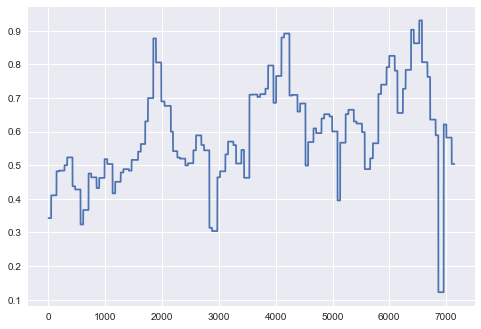

In [1081]:
plt.plot(ratio)

In [1091]:
for i in ratio:
    print(i)

0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.34271119598801375
0.4104767639170179
0.4104767639170179
0.4104767639170179
0.4

In [17]:
def to_datetime(x):
    year = int(x)
    month = x - int(x)
    month = month*12 + 1
    month = round(month)
    return(pd.to_datetime(str(year)+'-'+str(month)))

In [19]:
def to_datetime2(year, month):
    return(pd.to_datetime(str(year)+'-'+str(month)))